In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import markers
import pandas as pd



In [3]:
# read recorded signal
f_data = open('data.txt', 'r')
data = f_data.read().split()
data = list(map(float, data))
f_data.close()

# read true signal
f_ref = open('reference_signal.txt', 'r')
ref = f_ref.read().split()
ref = list(map(float, ref))
f_ref.close()

In [4]:
def kalman(m0=0,v0=1,data=[0,],A=1,H=1,R=1,Q=1):
  
    # get number of observations y
    y = data
    numDataPoints = len(y)

    # initialize list of means and variances of each step
    listMean = []
    listMean.append(m0)
    listVar = []
    listVar.append(v0)

    for i in range(1,numDataPoints+1):
        
        # forecast
        meanF = A*listMean[i-1]
        varF = A**2*listVar[i-1] + Q

        # kalman filter
        K = varF*H/(H**2*varF+R)

        # analysis
        meanA = meanF - K*(H*meanF-y[i-1])
        varA = varF - K*H*varF

        # write analysis in list
        listMean.append(meanA)
        listVar.append(varA)
        
    return listMean,listVar  


def MSE(y1,y2):
    ar1 = np.array(y1)
    ar2 = np.array(y2)
    return np.mean((ar1-ar2)**2)


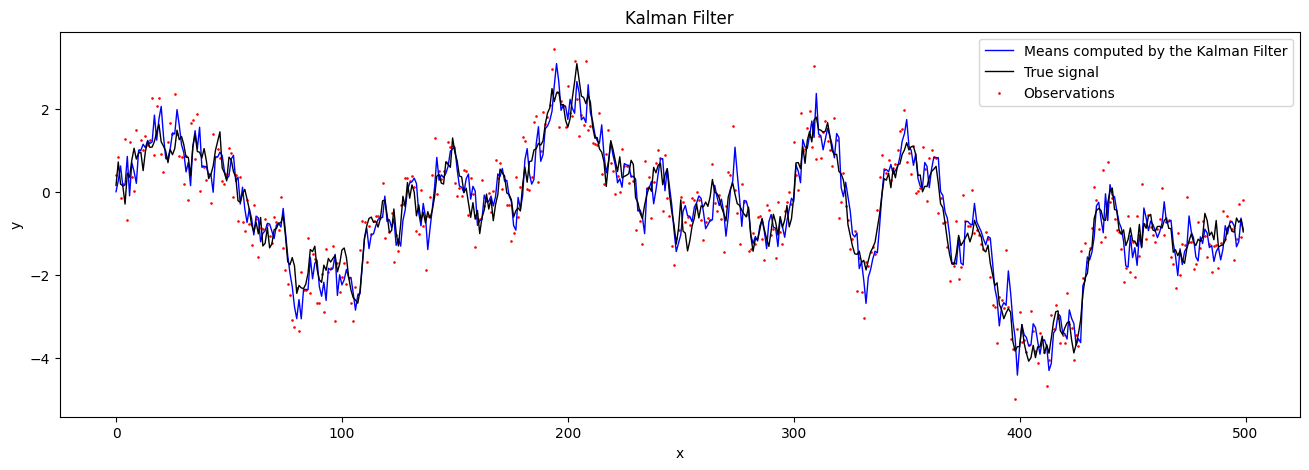

0.12579321599921695


In [5]:
meanInit = 0
varInit = 0.5
A = 0.99
H = 1
R = 0.5
Q = 0.5
listMean, listVar = kalman(meanInit,varInit,data,A,H,R,Q)

plt.figure(figsize=(16,5))
plt.plot(listMean[:500],'b-',lw=1)
plt.plot(ref[:500],'k-',lw=1)
plt.scatter(list(range(len(data[:500]))), data[:500], s=0.8, c='red')
plt.title('Kalman Filter')
plt.legend(['Means computed by the Kalman Filter','True signal','Observations'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(MSE(listMean,ref))
